# Proyecto predicciones para pérdida de clientes

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
# Cargar los datos
df = pd.read_csv('datasets/Churn.csv')

In [3]:
# Analizar datos del primer Dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Valores nulos
print(df.isnull().sum(),"\n")

# Identificar valores duplicados
print("Valores duplicados: ", df.duplicated().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64 

Valores duplicados:  0


In [5]:
# Filas con al menos un valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]
filas_con_nulos

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
tenure_con_0 = df.query('Tenure == 0')

if len(tenure_con_0) > 0:
    display(tenure_con_0)
else:
    print("No existen filas con 0 en Tenure")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


In [7]:
# Rellenar TODOS los valores nulos en todas las columnas con 0
df = df.fillna(0)

**NOTA:**

En este caso, los valores nulos no afectan con lo requerido para esta práctica, pero si con el uso de los modelos, así que decidí llenar los valores nulos a 0 debido a que Tenure es un producto que maneja temporalidades y si está nulo es porque no han adquirido ese producto por lo que se puede representar como que llevan 0 años de periodo.

In [8]:
# Se analiza la columna 'Exited' si tiene strings
converted = pd.to_numeric(df['Exited'], errors='coerce')
string_values = df['Exited'][converted.isna() & df['Exited'].notna()]

if not string_values.empty:
    print(f"Se encontraron {len(string_values)} valores string:")
    print(string_values.unique())
else:
    print("No se encontraron strings en la columna")

No se encontraron strings en la columna


In [9]:
# Eliminamos columnas innecesarias
drop_cols = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

#U tilizamos la tecnica de OHE
data_ohe = pd.get_dummies(drop_cols, drop_first=True)
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

In [10]:
# Entrenamiento del modelo
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# Info y muetras de datos 
print(features_train.shape)
print(features_valid.shape)
features_train.head()

(7500, 11)
(2500, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
226,694,30,9.0,0.00,2,1,1,26960.31,False,False,False
7756,621,36,7.0,116338.68,1,1,1,155743.48,False,True,False
2065,626,33,8.0,0.00,2,1,0,138504.28,False,False,True
2800,769,51,9.0,156773.78,2,1,0,40257.79,False,False,True
7028,718,26,0.0,147527.03,1,0,0,51099.56,True,False,True


Distribución de clases en el dataset completo (%):
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


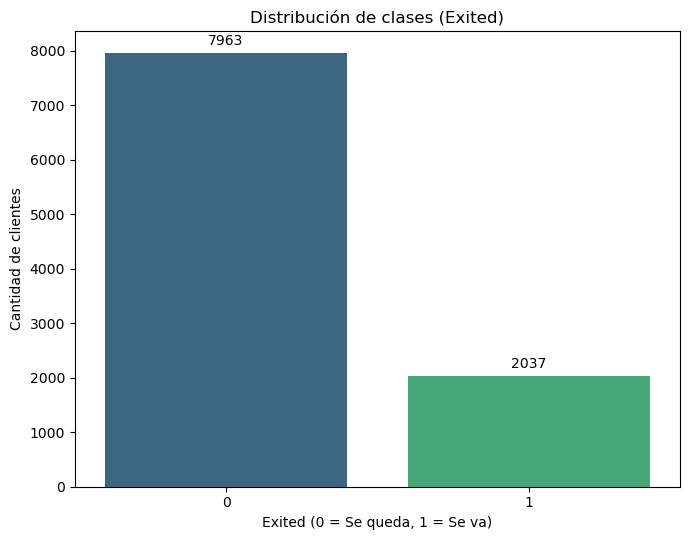

In [11]:
class_counts = target.value_counts()

print("Distribución de clases en el dataset completo (%):")
print((target.value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(7,5.5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    hue=class_counts.index,   # evita el warning asignando hue
    palette="viridis",
    legend=False              # quita leyenda redundante
)
plt.title("Distribución de clases (Exited)")
plt.xlabel("Exited (0 = Se queda, 1 = Se va)")
plt.ylabel("Cantidad de clientes")
plt.xticks([0, 1])

for i, v in enumerate(class_counts.values):
    plt.text(i, v + max(class_counts.values)*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


 **NOTA:** El dataset está desbalanceado, lo que puede afectar el rendimiento del modelo, especialmente en la detección de la clase minoritaria

In [12]:
# Logistic Regression
lr_model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
lr_model.fit(features_train, target_train)
lr_preds = lr_model.predict(features_valid)
print("Logistic Regression exactitud:", accuracy_score(target_valid, lr_preds))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
dt_model.fit(features_train, target_train)
dt_preds = dt_model.predict(features_valid)
print("Decision Tree exactitud:", accuracy_score(target_valid, dt_preds))

# Random Forest
rf_model = RandomForestClassifier(random_state=12345, class_weight='balanced')
rf_model.fit(features_train, target_train)
rf_preds = rf_model.predict(features_valid)
print("Random Forest exactitud:", accuracy_score(target_valid, rf_preds))

Logistic Regression exactitud: 0.6876
Decision Tree exactitud: 0.796


Random Forest exactitud: 0.8512


In [13]:
# Logistic Regression
print("Logistic Regression recall:", recall_score(target_valid, lr_preds))

# Decision Tree
print("Decision Tree recall:", recall_score(target_valid, dt_preds))

# Random Forest
print("Random Forest recall:", recall_score(target_valid, rf_preds))

Logistic Regression recall: 0.702803738317757
Decision Tree recall: 0.497196261682243
Random Forest recall: 0.42990654205607476


In [14]:
# Logistic Regression
print("Logistic Regression precisión :", precision_score(target_valid, lr_preds))

# Decision Tree
print("Decision Tree precisión :", precision_score(target_valid, dt_preds))

# Random Forest
print("Random Forest precisión :", precision_score(target_valid, rf_preds))

Logistic Regression precisión : 0.37675350701402804
Decision Tree precisión : 0.52465483234714
Random Forest precisión : 0.7744107744107744


In [15]:
# Logistic Regression
print("Logistic Regression F1 :", f1_score(target_valid, lr_preds))

# Decision Tree
print("Decision Tree F1 :", f1_score(target_valid, dt_preds))

# Random Forest
print("Random Forest F1 :", f1_score(target_valid, rf_preds))

Logistic Regression F1 : 0.49054142204827134
Decision Tree F1 : 0.510556621880998
Random Forest F1 : 0.5528846153846154


Modelo seleccionado: **Random Forest**

* Exactitud: 85%
* Recall: 42% 
* Precisión: 77%
* F1: 55% (Métrica a mejorar)

Fue el modelo con las mejores estadísticas.

In [16]:
# Funición upsample() para trabajar el sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10)

In [17]:
# Se entrena el modelo con datos filtrados por sobremuestreo
rf_model.fit(features_upsampled, target_upsampled)
pred_valid_up = rf_model.predict(features_valid)
print("Random Forest exactitud:", accuracy_score(target_valid, pred_valid_up))
print("Random Forest recall:", recall_score(target_valid, pred_valid_up))
print("Random Forest precisión :", precision_score(target_valid, pred_valid_up))
print('Random Forest F1:', f1_score(target_valid, pred_valid_up))


Random Forest exactitud: 0.8476
Random Forest recall: 0.5551401869158878
Random Forest precisión : 0.675
Random Forest F1: 0.6092307692307692


In [18]:
# Funición downsample() para trabajar el submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1)

In [19]:
# Se entrena el modelo con datos filtrados por submuestreo
rf_model.fit(features_downsampled, target_downsampled)
pred_valid_down = rf_model.predict(features_valid)
print("Random Forest exactitud:", accuracy_score(target_valid, pred_valid_down))
print("Random Forest recall:", recall_score(target_valid, pred_valid_down))
print("Random Forest precisión :", precision_score(target_valid, pred_valid_down))
print('Random Forest F1:', f1_score(target_valid, pred_valid_down))

Random Forest exactitud: 0.6032
Random Forest recall: 0.9233644859813084
Random Forest precisión : 0.34186851211072666
Random Forest F1: 0.498989898989899


**CONCLUSIÓN PARA F1**

Se logró obtener F1 = 0.609 para el modelo escogido, al final se tuvo que usar el hiperparámetro "class_weight='balanced'" y entrenar los datos mediante sobremuestreo y submuestreo, observando que en el submuestreo las estadísticas no fueron favorables como en el sobremuestreo.

Estadísticas finales usando **sobremuestreo**:
* Random Forest exactitud: 0.84
* Random Forest recall: 0.55
* Random Forest precisión : 0.67
* Random Forest F1: 0.609 (**META LOGRADA**)

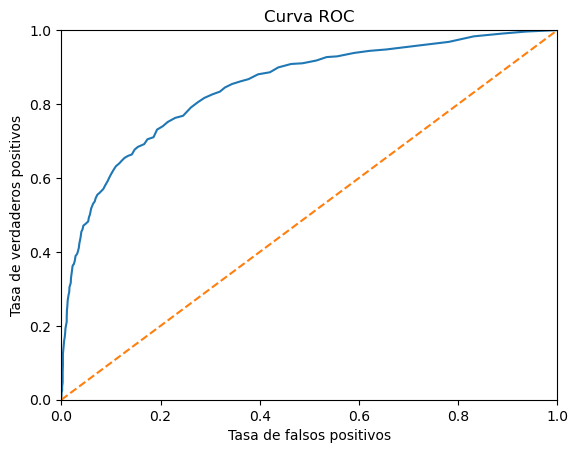

In [20]:
rf_model.fit(features_upsampled, target_upsampled)

probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [21]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC_ROC del modelo: ', auc_roc)

AUC_ROC del modelo:  0.8472711707212671


**NOTA**: La curva ROC tiene una inclinación prominente a la punta superior izquierda por lo que el resultado es mejor que el modelo aleatorio

**CONCLUSIÓN FINAL:**

Se hicieron comparaciones entre las estadísticas de 3 modelos para poder escoger el mejor. Cuando se escogió el modelo RANDOM FOREST como el mejor, también se tuvo en cuenta que el valor de F1 era muy bajo, por lo que se trabajó para poderlo aumentar, se le agregó un class_weight='balanced' y también se sometió a una prueba de sobremuestreo para emparejar las observaciones, esta técnica ayuda al modelo a reconocer y clasificar mejor las instancias de clase minoritaria, lo que finalmente aumenta el valor F1.